In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import confidence_planner as cp

# example dataset and CV procedure
X, y = datasets.load_breast_cancer(return_X_y=True)

# training the classifier and calculating accuracy
n_splits = 10
clf = SVC(gamma=0.001)
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=n_splits, n_jobs=-1)
acc = np.mean(scores)

# confidence interval and sample size estimation
ci = cp.estimate_confidence_interval(y.shape[0], acc, confidence_level=0.90, method="cv", n_splits=n_splits)
sample = cp.estimate_sample_size(interval_radius=0.1, confidence_level=0.90, method="cv", n_splits=n_splits)

print(f"Mean 10-fold CV accuracy: {acc}")
print(f"90% CI: {ci}")
print(f"Test samples needed for a 0.10 radius 90% CI: {sample}")

Mean 10-fold CV accuracy: 0.92437343358396
90% CI: [0.7621250540097285, 1.0]
Test samples needed for a 0.10 radius 90% CI: 1498


In [2]:
acc_svm = acc

clf_nb = GaussianNB()
scores_nb = cross_val_score(clf_nb, X, y, scoring='accuracy', cv=n_splits, n_jobs=-1)
acc_nb = np.mean(scores_nb)

clf_rf = RandomForestClassifier(random_state=23)
scores_rf = cross_val_score(clf_rf, X, y, scoring='accuracy', cv=n_splits, n_jobs=-1)
acc_rf = np.mean(scores_rf)

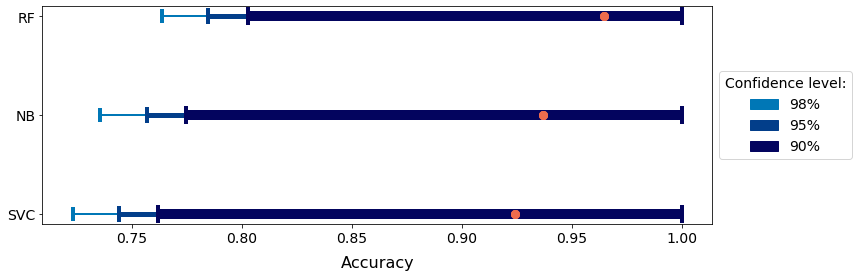

In [3]:
fig = cp.plot_classifier_intervals(
    ["SVC", "NB", "RF"], 
    [y.shape[0]]*3, 
    [acc_svm, acc_nb, acc_rf],
    method="cv",
    n_splits=n_splits,
    width=12,
    height=4
);